📊 Desafio 56 — Análise de Clientes Online
📂 Dataset: Clique aqui para baixar o CSV

Este conjunto de dados simula informações de clientes de uma plataforma online, incluindo tempo médio diário online, frequência de compras e status de atividade.

🔍 Tarefas:

Tratamento de Dados

- Existe alguma coluna com valores duplicados ou inconsistentes? Realize uma verificação simples de qualidade dos dados.

Análise Exploratória

- Qual a média de tempo online diário dos clientes ativos versus os inativos?

Visualização de Dados

- Crie um gráfico de barras comparando o número médio de compras mensais por gênero.

Machine Learning Básico

- Treine um modelo de classificação para prever se um cliente é ativo (cliente_ativo), com base nas demais variáveis.

- Use LogisticRegression ou RandomForestClassifier.

- Divida os dados com train_test_split e avalie usando accuracy_score e classification_report.

- Quais variáveis mais influenciam o modelo?

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv("dia_56_clientes_online.csv")
df.head()

,idade,genero,tempo_online_diario_min,compras_mensais,pontuacao_satisfacao,cliente_ativo
0,22,F,120,5,8.2,1
1,34,M,95,2,6.5,1
2,29,F,135,6,9.0,1
3,41,M,80,1,5.8,0
4,25,F,150,7,9.3,1


In [9]:
#Existe alguma coluna com valores duplicados ou inconsistentes? Realize uma verificação simples de qualidade dos dados.
print(f"Valores Duplicados: {df.duplicated().sum()}\n\n")
df.info()

Valores Duplicados: 0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   idade                    10 non-null     int64  
 1   genero                   10 non-null     object 
 2   tempo_online_diario_min  10 non-null     int64  
 3   compras_mensais          10 non-null     int64  
 4   pontuacao_satisfacao     10 non-null     float64
 5   cliente_ativo            10 non-null     int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 612.0+ bytes


In [12]:
#Qual a média de tempo online diário dos clientes ativos versus os inativos?
tempoOnlineClientes = df.groupby("cliente_ativo")["tempo_online_diario_min"].mean()
print(tempoOnlineClientes.to_string())

cliente_ativo
0     73.75
1    125.00


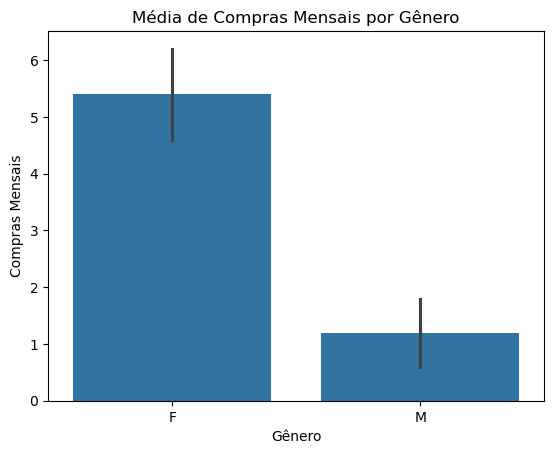

In [17]:
#Crie um gráfico de barras comparando o número médio de compras mensais por gênero.
sns.barplot(data=df, x="genero", y="compras_mensais")
plt.title("Média de Compras Mensais por Gênero")
plt.xlabel("Gênero")
plt.ylabel("Compras Mensais")
plt.show()

In [25]:
#Treine um modelo de classificação para prever se um cliente é ativo (cliente_ativo), com base nas demais variáveis.
le = LabelEncoder()
df["genero"] = le.fit_transform(df["genero"])

X = df.drop(["cliente_ativo"], axis=1)
y = df["cliente_ativo"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(f"Acurácia: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

importancias = pd.DataFrame({"variavel": X.columns, "importancia": model.feature_importances_})
print(importancias.sort_values("importancia", ascending=False))

Acurácia: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         1

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3

                  variavel  importancia
0                    idade     0.250000
3          compras_mensais     0.215909
1                   genero     0.193182
4     pontuacao_satisfacao     0.193182
2  tempo_online_diario_min     0.147727
